In [85]:
import os
import re
from pathlib import Path

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [76]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

figdir = '../results/figures/figure_making_10312020'
Path(figdir).mkdir(parents=True, exist_ok=True)
sc.settings.figdir = figdir

In [77]:
adata = sc.read_h5ad('../results/cytotrace/eus_adata_step3.h5ad')
adata

AnnData object with n_obs × n_vars = 11030 × 2923
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type', 'cytotrace', 'ductal_subtype'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 

In [78]:
sorted(set(adata.obs['sample_id'])), len(set(adata.obs['cell_type']))

(['wu01',
  'wu02',
  'wu03',
  'wu04',
  'wu05',
  'wu07',
  'wu09',
  'wu14',
  'wu15',
  'wu16',
  'wu18',
  'wu22',
  'wu23',
  'wu24'],
 20)

In [79]:
surgical_adata = sc.read_h5ad('../results/cytotrace/surgical_adata.h5ad')
surgical_adata

AnnData object with n_obs × n_vars = 22882 × 1902
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type', 'cytotrace'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 

In [80]:
sorted(set(surgical_adata.obs['sample_id']))

['1555-tumor',
 'H_ZY-1105-07',
 'H_ZY-1160-06',
 'H_ZY-1174-06',
 'TWCE-HT055P-S1PAG',
 'TWCE-HT081P1-XB1']

In [81]:
tumor = adata[((adata.obs['cell_type']=='malignant_classical') | (
    adata.obs['cell_type']=='malignant_squamous_like'))].copy()
tumor

AnnData object with n_obs × n_vars = 1847 × 2923
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type', 'cytotrace', 'ductal_subtype'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', '

In [82]:
surgical_tumor = surgical_adata[((surgical_adata.obs['cell_type']=='malignant_classical') | (
    surgical_adata.obs['cell_type']=='malignant_squamous_like'))].copy()
surgical_tumor.obs['ductal_subtype'] = ['Classical' if 'malignant_classical' ==x else 'Squamous-like'
                                       for x in surgical_tumor.obs['cell_type']]
surgical_tumor

AnnData object with n_obs × n_vars = 8312 × 1902
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type', 'cytotrace', 'ductal_subtype'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
  

#### nice cytotrace distribution

In [89]:
tumor.var

gene_ids-0  feature_types-0       gene_ids-1  \
ISG15       ENSG00000187608  Gene Expression  ENSG00000187608   
RNF223      ENSG00000237330  Gene Expression  ENSG00000237330   
TNFRSF18    ENSG00000186891  Gene Expression  ENSG00000186891   
TNFRSF4     ENSG00000186827  Gene Expression  ENSG00000186827   
MXRA8       ENSG00000162576  Gene Expression  ENSG00000162576   
...                     ...              ...              ...   
MCM3AP-AS1  ENSG00000215424  Gene Expression  ENSG00000215424   
MCM3AP      ENSG00000160294  Gene Expression  ENSG00000160294   
C21orf58    ENSG00000160298  Gene Expression  ENSG00000160298   
S100B       ENSG00000160307  Gene Expression  ENSG00000160307   
AC233755.1  ENSG00000275063  Gene Expression  ENSG00000275063   

                gene_ids-10 feature_types-10      gene_ids-11  \
ISG15       ENSG00000187608  Gene Expression  ENSG00000187608   
RNF223      ENSG00000237330  Gene Expression  ENSG00000237330   
TNFRSF18    ENSG00000186891  Gene Expression  ENSG00000186891   
TNFRSF4     ENSG00000186827  Gene Expression  ENSG00000186827   
MXRA8       ENSG00000162576  Gene Expression  ENSG00000162576   
...                     ...              ...              ...   
MCM3AP-AS1  ENSG00000215424  Gene Expression  ENSG00000215424   
MCM3AP      ENSG00000160294  Gene Expression  ENSG00000160294   
C21orf58    ENSG00000160298  Gene Expression  ENSG00000160298   
S100B       ENSG00000160307  Gene Expression  ENSG00000160307   
AC233755.1  ENSG00000275063  Gene Expression  ENSG00000275063   

           feature_types-11      gene_ids-12 feature_types-12  \
ISG15       Gene Expression  ENSG00000187608  Gene Expression   
RNF223      Gene Expression  ENSG00000237330  Gene Expression   
TNFRSF18    Gene Expression  ENSG00000186891  Gene Expression   
TNFRSF4     Gene Expression  ENSG00000186827  Gene Expression   
MXRA8       Gene Expression  ENSG00000162576  Gene Expression   
...                     ...              ...              ...   
MCM3AP-AS1  Gene Expression  ENSG00000215424  Gene Expression   
MCM3AP      Gene Expression  ENSG00000160294  Gene Expression   
C21orf58    Gene Expression  ENSG00000160298  Gene Expression   
S100B       Gene Expression  ENSG00000160307  Gene Expression   
AC233755.1  Gene Expression  ENSG00000275063  Gene Expression   

                gene_ids-13  ... mean_counts pct_dropout_by_counts  \
ISG15       ENSG00000187608  ...    0.862118             76.540108   
RNF223      ENSG00000237330  ...    0.015244             98.818156   
TNFRSF18    ENSG00000186891  ...    0.042250             97.607765   
TNFRSF4     ENSG00000186827  ...    0.051613             96.939766   
MXRA8       ENSG00000162576  ...    0.139195             96.922638   
...                     ...  ...         ...                   ...   
MCM3AP-AS1  ENSG00000215424  ...    0.008792             99.200685   
MCM3AP      ENSG00000160294  ...    0.144676             88.615472   
C21orf58    ENSG00000160298  ...    0.024893             98.487011   
S100B       ENSG00000160307  ...    0.199258             95.689409   
AC233755.1  ENSG00000275063  ...    0.043163             99.862975   

           total_counts highly_variable     means dispersions  \
ISG15           15100.0            True  0.979186    3.170052   
RNF223            267.0            True  0.015967    2.879332   
TNFRSF18          740.0            True  0.123177    2.469263   
TNFRSF4           904.0            True  0.153105    2.659127   
MXRA8            2438.0            True  0.165184    2.703765   
...                 ...             ...       ...         ...   
MCM3AP-AS1        154.0            True  0.014368    2.652294   
MCM3AP           2534.0            True  0.253252    2.358109   
C21orf58          436.0            True  0.022695    2.447666   
S100B            3490.0            True  0.574919    3.989472   
AC233755.1        756.0            True  0.230644    7.901727   

           dispersions_norm          mean       std 

In [103]:
data = pd.DataFrame.from_dict({
    'Gene': tumor.var.index.to_list(),
    'CytoTRACE correlation': tumor.var['cytotrace_correlation'].to_list()
})
data = data.sort_values('CytoTRACE correlation')
data['Genes'] = list(range(data.shape[0]))

In [111]:
chart = alt.Chart(data).mark_area().encode(
    x=alt.X('Genes:Q', axis=None),
    y=alt.Y('CytoTRACE correlation', axis=alt.Axis(grid=False), scale=alt.Scale(domain=[-.1, .8]))
)
chart.configure_view(strokeOpacity=0)

alt.Chart(...)

#### single cell umaps

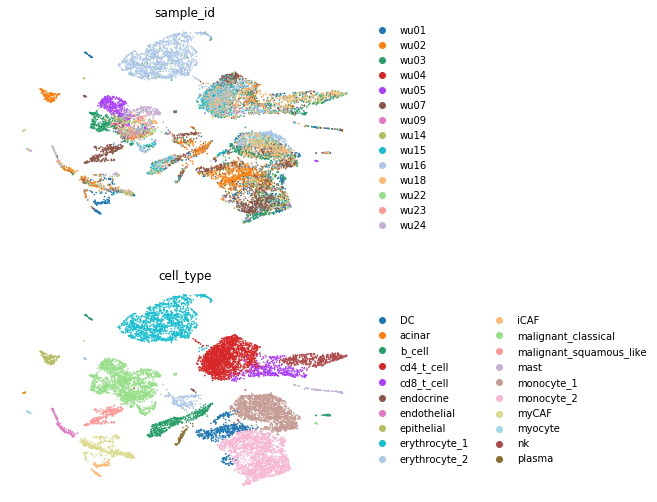

In [37]:
sc.pl.umap(adata, color=['sample_id', 'cell_type'], ncols=1, frameon=False,
          save='_all_single_cell_umap.pdf')

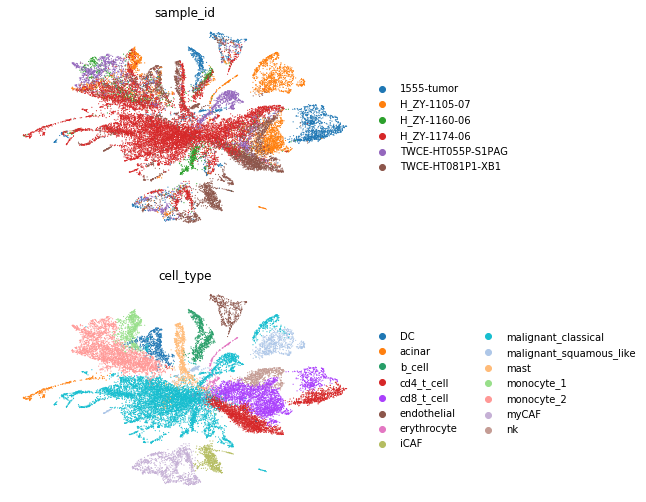

In [39]:
sc.pl.umap(surgical_adata, color=['sample_id', 'cell_type'], ncols=1, frameon=False,
          save='_all_single_cell_umap_surgical.pdf')

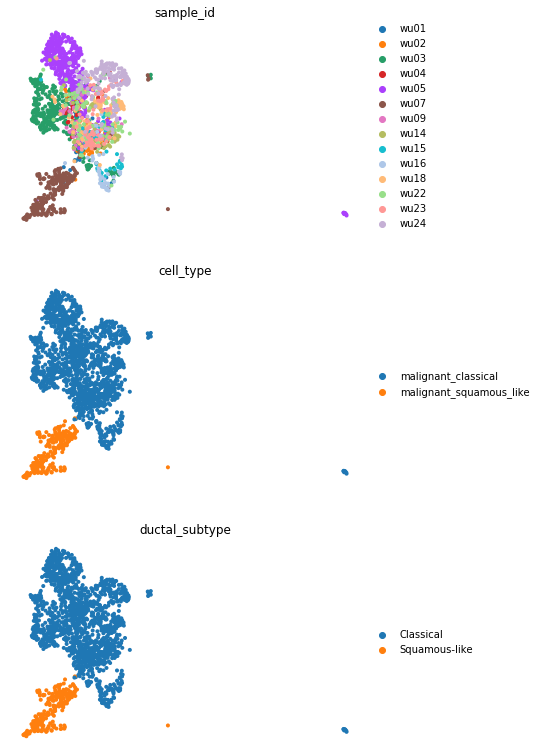

In [38]:
sc.pl.umap(tumor, color=['sample_id', 'cell_type', 'ductal_subtype'], ncols=1, frameon=False,
          save='_tumor_single_cell_umap.pdf')

... storing 'ductal_subtype' as categorical


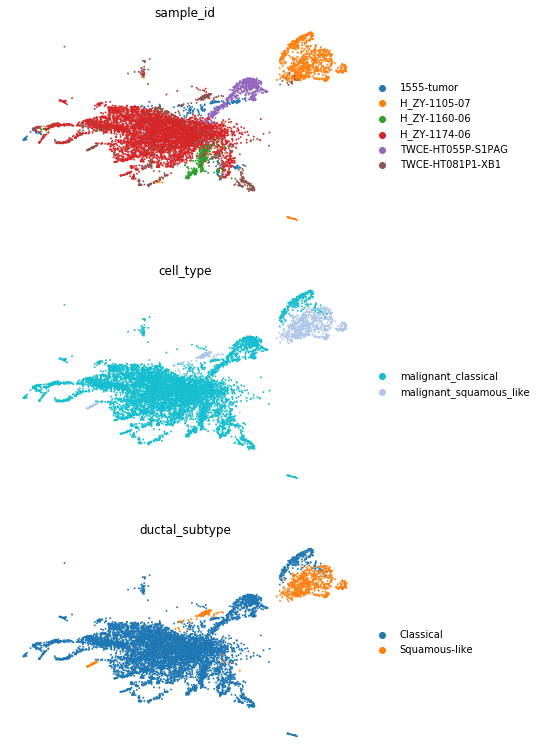

In [42]:
sc.pl.umap(surgical_tumor, color=['sample_id', 'cell_type', 'ductal_subtype'], ncols=1, frameon=False,
          save='_tumor_single_cell_umap_surgical.pdf')

In [52]:
classical, squam = (tumor[tumor.obs['ductal_subtype']=='Classical'],
                    tumor[tumor.obs['ductal_subtype']=='Squamous-like'])
print(classical.shape, squam.shape)

(1585, 2923) (262, 2923)


In [57]:
from collections import Counter
Counter(classical.obs['sample_id']), Counter(squam.obs['sample_id'])

(Counter({'wu01': 31,
          'wu02': 114,
          'wu03': 312,
          'wu04': 27,
          'wu05': 424,
          'wu07': 15,
          'wu09': 59,
          'wu14': 76,
          'wu15': 45,
          'wu16': 50,
          'wu18': 97,
          'wu22': 96,
          'wu23': 75,
          'wu24': 164}),
 Counter({'wu01': 4, 'wu02': 1, 'wu05': 1, 'wu07': 255, 'wu16': 1}))

#### cytotrace umaps

In [5]:
# !pip install matplotlib==3.0.2
# !pip install matplotlib==3.1.2

In [51]:
def plot_cytotrace_3d(adata, color='cytotrace', categorical=False, palette=sns.color_palette()):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if categorical:
        subtype_to_c = {c:palette[i] for i, c in enumerate(sorted(set(adata.obs['ductal_subtype'])))}
        for i, subtype in enumerate(sorted(set(adata.obs['ductal_subtype']))):
            p = adata[adata.obs['ductal_subtype']==subtype]
            ax.scatter(p.obsm['X_umap'][:, 0].flatten(), p.obsm['X_umap'][:, 1].flatten(),
                   p.obs['cytotrace'], c=palette[i], label=subtype)
#         colors = [subtype_to_c[s] for s in adata.obs['ductal_subtype']]
#         ax.scatter(adata.obsm['X_umap'][:, 0].flatten(), adata.obsm['X_umap'][:, 1].flatten(),
#                    adata.obs['cytotrace'], c=colors, label=adata.obs['ductal_subtype'])
        ax.legend()
        
    else:
        ax.scatter(adata.obsm['X_umap'][:, 0].flatten(), adata.obsm['X_umap'][:, 1].flatten(),
                   adata.obs['cytotrace'], c=adata.obs['cytotrace'], cmap='inferno')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('Cytotrace')
    
    return ax

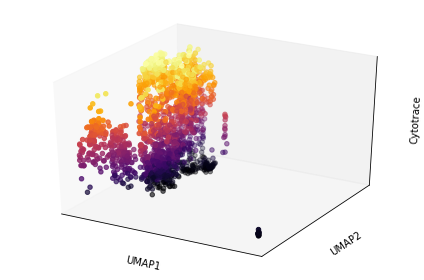

In [33]:
p = tumor.copy()

plot_cytotrace_3d(p, color='cytotrace')

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'umap3d_cytotrace.pdf'))

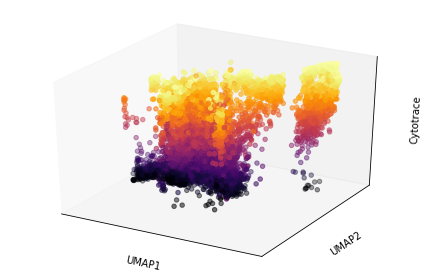

In [43]:
p = surgical_tumor.copy()

plot_cytotrace_3d(p, color='cytotrace')

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'umap3d_cytotrace_surgical.pdf'))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


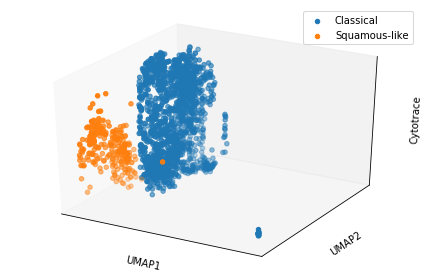

In [53]:
p = tumor.copy()

plot_cytotrace_3d(p, color='ductal_subtype', categorical=True)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'umap3d_ductal_subtype.pdf'))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


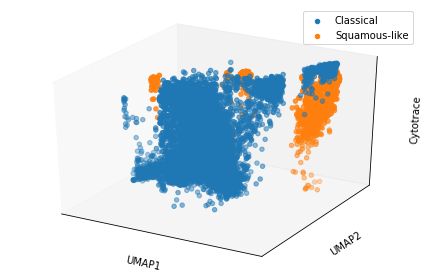

In [52]:
p = surgical_tumor.copy()

plot_cytotrace_3d(p, color='ductal_subtype', categorical=True)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'umap3d_ductal_subtype_surgical.pdf'))

In [26]:
# p = tumor.copy()
# # p.obsm['X_umap'] = cytotrace_adata.obsm['cytotrace_umap']
# p.obsm['X_umap'] = np.concatenate((p.obsm['X_umap'], np.asarray(tumor.obs['cytotrace']).reshape((-1, 1))),
#                                   axis=1)
# sc.pl.umap(p, color=['ductal_subtype'], projection='3d', components='all', title='',
#           save='_3d_cytotrace_umap_ductal_substate.pdf')

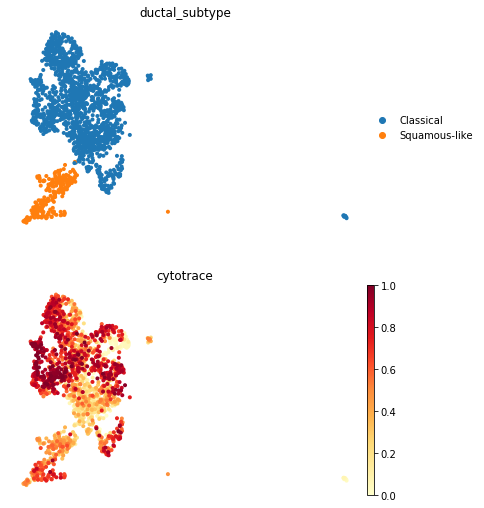

In [54]:
sc.pl.umap(tumor, color=['ductal_subtype', 'cytotrace'], ncols=1, frameon=False, color_map='YlOrRd',
          save='_tumor_cytotrace_umap.pdf')

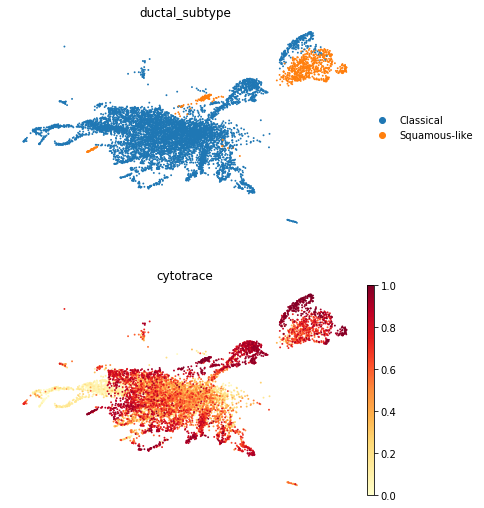

In [55]:
sc.pl.umap(surgical_tumor, color=['ductal_subtype', 'cytotrace'], ncols=1, frameon=False, color_map='YlOrRd',
          save='_tumor_cytotrace_umap_surgical.pdf')

#### DEG

categories: Classical, Squamous-like
var_group_labels: Squamous-like, Classical


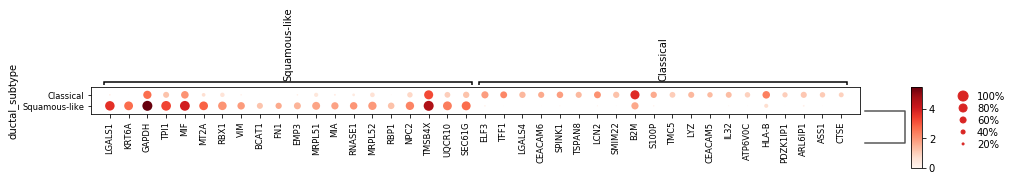

In [114]:
sc.tl.rank_genes_groups(tumor, 'ductal_subtype', n_genes=tumor.raw.shape[1])
sc.pl.rank_genes_groups_dotplot(tumor, n_genes=20, groups=['Squamous-like', 'Classical'],
                               save='_ductal_subtype_DEG.pdf')

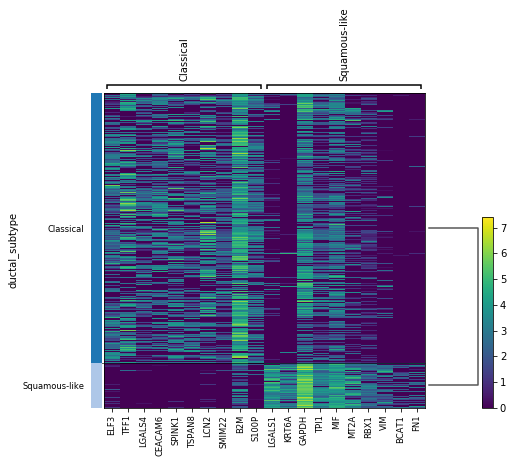

In [62]:
sc.pl.rank_genes_groups_heatmap(tumor,
                               save='_ductal_subtype_DEG_heatmap.pdf')

In [56]:
sorted(set(adata.obs['cell_type']))

['DC',
 'acinar',
 'b_cell',
 'cd4_t_cell',
 'cd8_t_cell',
 'endocrine',
 'endothelial',
 'epithelial',
 'erythrocyte_1',
 'erythrocyte_2',
 'iCAF',
 'malignant_classical',
 'malignant_squamous_like',
 'mast',
 'monocyte_1',
 'monocyte_2',
 'myCAF',
 'myocyte',
 'nk',
 'plasma']

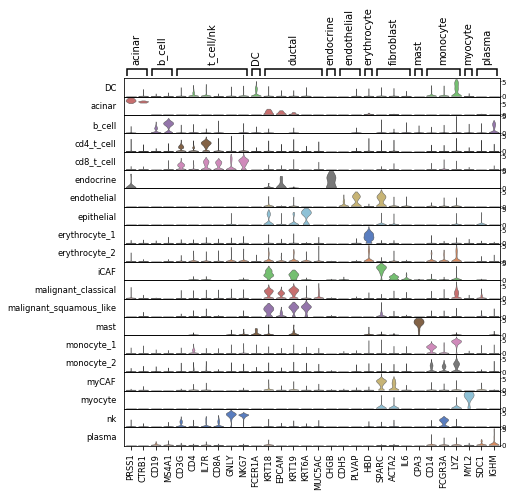

<Figure size 432x288 with 0 Axes>

In [62]:
markers = {
    'acinar': ['PRSS1', 'CTRB1'],
    'b_cell': ['CD19', 'MS4A1'],
    't_cell/nk': ['CD3G', 'CD4', 'IL7R', 'CD8A', 'GNLY', 'NKG7'],
    'DC': ['FCER1A'],
    'ductal': ['KRT18', 'EPCAM', 'KRT19', 'KRT6A', 'MUC5AC'],
    'endocrine': ['CHGB'],
    'endothelial': ['CDH5', 'PLVAP'],
    'erythrocyte': ['HBD'],
    'fibroblast': ['SPARC', 'ACTA2', 'IL6'],
    'mast': ['CPA3'],
    'monocyte': ['CD14', 'FCGR3A', 'LYZ'],
    'myocyte': ['MYL2'],
    'plasma': ['SDC1', 'IGHM']
}
order = [
 'acinar',
 'b_cell',
 'cd4_t_cell',
 'cd8_t_cell',
 'nk',
 'DC',
 'malignant_classical',
 'malignant_squamous_like',
 'epithelial',
 'endocrine',
 'endothelial',
 'erythrocyte_1',
 'erythrocyte_2',
 'myCAF',
 'iCAF',
 'mast',
 'monocyte_1',
 'monocyte_2',
 'myocyte',
 'plasma']
ax = sc.pl.stacked_violin(adata, markers, groupby='cell_type', swap_axes=False, dendrogram=False,
                         order=order, )
plt.savefig(os.path.join(figdir, 'marker_violin_plot.pdf'))

#### bulk TCGA w/ ed signature and squam signature

In [200]:
from sklearn.preprocessing import StandardScaler

In [202]:
expression_df = pd.read_csv('../data/bulk_rna_seq/tcga.txt', sep='\t', index_col='Gene')
# trying standard scale
expression_df = pd.DataFrame(data=StandardScaler().fit_transform(expression_df.values.transpose()).transpose(),
                            columns=expression_df.columns, index=expression_df.index)
expression_df

TCGA-OE-A75W-01A-12R-A32O-07  TCGA-2J-AABT-01A-11R-A41B-07  \
Gene                                                                       
A1BG                              0.007555                     -0.426652   
A1BG-AS1                         -0.055960                     -0.306757   
A1CF                             -0.512022                     -0.377239   
A2M                              -0.707090                      1.034191   
A2M-AS1                          -0.733575                      2.176914   
...                                    ...                           ...   
ZYG11A                           -0.186519                     -0.384111   
ZYG11B                           -1.772540                      1.737948   
ZYX                               0.834982                      2.762488   
ZZEF1                            -1.077943                      1.350771   
hsa-mir-1253                      0.000000                      0.000000   

              TCGA-IB-7886-01A-11R-2156-07  TCGA-IB-AAUU-01A-11R-A37L-07  \
Gene                                                                       
A1BG                             -0.484546                     -0.412178   
A1BG-AS1                         -0.533086                     -0.465799   
A1CF                              0.421498                      0.117407   
A2M                               0.091151                     -0.542783   
A2M-AS1                          -0.464323                     -0.592538   
...                                    ...                           ...   
ZYG11A                           -0.502667                     -0.186519   
ZYG11B                            0.436045                     -0.054028   
ZYX                              -0.191350                      1.560479   
ZZEF1                             0.028750                     -0.810495   
hsa-mir-1253                      0.000000                      0.000000   

              TCGA-2J-AAB6-01A-11R-A41B-07  TCGA-LB-A8F3-01A-11R-A36G-07  \
Gene                                                                       
A1BG                             -0.339811                     -0.397705   
A1BG-AS1                         -0.251704                     -0.710479   
A1CF                             -0.590369                      0.132014   
A2M                              -0.936153                      0.111736   
A2M-AS1                          -0.605360                     -1.182329   
...                                    ...                           ...   
ZYG11A                           -0.305074                     -0.502667   
ZYG11B                           -0.006601                     -1.757661   
ZYX                               2.292624                     -0.037610   
ZZEF1                            -0.697886                     -0.749625   
hsa-mir-1253                      0.000000                      0.000000   

              TCGA-HZ-A4BH-01A-11R-A26U-07  TCGA-HV-A5A3-11A-11R-A26U-07  \
Gene                                                                       
A1BG                             -0.180601                     -0.209549   
A1BG-AS1                         -0.031492                      0.005210   
A1CF                             -0.031319                     -0.448946   
A2M                               0.529060                      1.525232   
A2M-AS1                          -0.643824                      0.343434   
...                                    ...                           ...   
ZYG11A                           -0.502667                     -0.305074   
ZYG11B                            0.062213                     -0.100524   
ZYX                               0.459223                      1.639391   
ZZEF1                            -0.242882                      0.060707   
hsa-mir-1253                      0.000000                      0.000000   

              TCGA-IB-7646-01A-11R-2156-07  TCGA-2J-AAB9-0

In [203]:
metadata = pd.read_csv('../results/survival/eus_deconvolved_v1_20/tcga_clinical.tsv', sep='\t')
metadata

sample_id     squam        ed  age  gender   race tumor_stage  \
0    TCGA-2J-AAB6  800.8875  952.0455   75    male  white   stage iia   
1    TCGA-2J-AAB8  687.5640  558.4205   71    male  white   stage iib   
2    TCGA-2J-AAB9  521.0175  677.6715   71  female  white   stage iib   
3    TCGA-2J-AABA  400.5160  570.3660   55    male  white   stage iib   
4    TCGA-2J-AABE  598.3935  501.2670   73    male  white   stage iia   
..            ...       ...       ...  ...     ...    ...         ...   
131  TCGA-XN-A8T3  691.6590  538.8720   67    male  white    stage ib   
132  TCGA-XN-A8T5  453.1490  360.6015   53  female  white    stage ib   
133  TCGA-YB-A89D  586.8640  543.8880   59    male  white   stage iib   
134  TCGA-YY-A8LH  348.9900  896.8080   61  female  white   stage iib   
135  TCGA-Z5-AAPL  421.5260  274.9325   74  female  white   stage iia   

     survival_time  status dataset  
0                9       2    tcga  
1                2       1    tcga  
2               20       2    tcga  
3               19       2    tcga  
4               22       1    tcga  
..             ...     ...     ...  
131             31       1    tcga  
132             23       1    tcga  
133             11       1    tcga  
134             66       1    tcga  
135             15       1    tcga  

[136 rows x 10 columns]

In [204]:
squam_genes = np.asarray(['LGALS1',
 'KRT6A',
 'MT2A',
 'BCAT1',
 'FN1',
 'MIA',
 'RNASE1',
 'RBP1',
 'TNNT1',
 'SERPINF1',
 'CSTB',
 'PFN2',
 'COL6A2',
 'S100A16',
 'PODXL',
 'STC2',
 'KRT5',
 'COL6A1',
 'COL6A3',
 'STMN1'])
ed_genes = np.asarray(['C19orf33',
 'TM4SF1',
 'KRT18',
 'KRT8',
 'PERP',
 'KRT19',
 'CST3',
 'IFI27',
 'S100A10',
 'SMIM22',
 'UBB',
 'CLDN4',
 'S100P',
 'KRT7',
 'TACSTD2',
 'SLPI',
 'CD24',
 'RAB25',
 'MDK',
 'IFITM3'])

In [205]:
df = expression_df.loc[np.concatenate((squam_genes, ed_genes))]
df['Gene'] = df.index.to_list()
df = pd.melt(df, id_vars='Gene')
df.columns = ['Gene', 'Sample', 'Expression']
df['Sample'] = [x[:12] for x in df['Sample']]
df['Expression'] = np.log1p(df['Expression'])
df

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Gene        Sample  Expression
0     LGALS1  TCGA-OE-A75W    0.951998
1      KRT6A  TCGA-OE-A75W   -0.026035
2       MT2A  TCGA-OE-A75W    0.163899
3      BCAT1  TCGA-OE-A75W    0.328157
4        FN1  TCGA-OE-A75W   -1.164562
...      ...           ...         ...
7275    SLPI  TCGA-3A-A9IJ         NaN
7276    CD24  TCGA-3A-A9IJ   -3.450146
7277   RAB25  TCGA-3A-A9IJ   -0.659287
7278     MDK  TCGA-3A-A9IJ   -2.422188
7279  IFITM3  TCGA-3A-A9IJ         NaN

[7280 rows x 3 columns]

In [206]:
df = pd.merge(df, metadata, left_on='Sample', right_on='sample_id')
df

Gene        Sample  Expression     sample_id     squam        ed  age  \
0     LGALS1  TCGA-OE-A75W    0.951998  TCGA-OE-A75W  533.0340  1049.841   75   
1      KRT6A  TCGA-OE-A75W   -0.026035  TCGA-OE-A75W  533.0340  1049.841   75   
2       MT2A  TCGA-OE-A75W    0.163899  TCGA-OE-A75W  533.0340  1049.841   75   
3      BCAT1  TCGA-OE-A75W    0.328157  TCGA-OE-A75W  533.0340  1049.841   75   
4        FN1  TCGA-OE-A75W   -1.164562  TCGA-OE-A75W  533.0340  1049.841   75   
...      ...           ...         ...           ...       ...       ...  ...   
5515    SLPI  TCGA-IB-7651   -2.489356  TCGA-IB-7651  640.9785   400.837   64   
5516    CD24  TCGA-IB-7651    0.402882  TCGA-IB-7651  640.9785   400.837   64   
5517   RAB25  TCGA-IB-7651   -1.587062  TCGA-IB-7651  640.9785   400.837   64   
5518     MDK  TCGA-IB-7651   -1.434300  TCGA-IB-7651  640.9785   400.837   64   
5519  IFITM3  TCGA-IB-7651    0.384640  TCGA-IB-7651  640.9785   400.837   64   

      gender   race tumor_stage  survival_time  status dataset  
0       male  white   stage iia              8       2    tcga  
1       male  white   stage iia              8       2    tcga  
2       male  white   stage iia              8       2    tcga  
3       male  white   stage iia              8       2    tcga  
4       male  white   stage iia              8       2    tcga  
...      ...    ...         ...            ...     ...     ...  
5515  female  white   stage iib             19       2    tcga  
5516  female  white   stage iib             19       2    tcga  
5517  female  white   stage iib             19       2    tcga  
5518  female  white   stage iib             19       2    tcga  
5519  female  white   stage iib             19       2    tcga  

[5520 rows x 13 columns]

In [207]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [208]:
sample_order = [s for s in metadata.sort_values('squam')['sample_id'] if s in df['Sample'].to_list()]
sample_order[:5]

['TCGA-2J-AABV',
 'TCGA-IB-8126',
 'TCGA-HZ-7924',
 'TCGA-S4-A8RM',
 'TCGA-FB-AAPP']

In [209]:
chart = alt.Chart(df).mark_rect().encode(
    x=alt.X('Sample:O', sort=sample_order),
    y=alt.Y('Gene:O', sort=np.concatenate((squam_genes, ed_genes))),
    color=alt.Color('Expression:Q', scale=alt.Scale(scheme='magma'))
)
chart.properties(width=700, height=700)

alt.Chart(...)

In [210]:
chart = alt.Chart(df).mark_rect().encode(
    x=alt.X('Sample:O', sort=sample_order),
    y=alt.Y('Gene:O', sort=np.concatenate((squam_genes, ed_genes))),
    color=alt.Color('Expression:Q', scale=alt.Scale(scheme='magma'))
)
chart.properties(width=700, height=700)

alt.Chart(...)

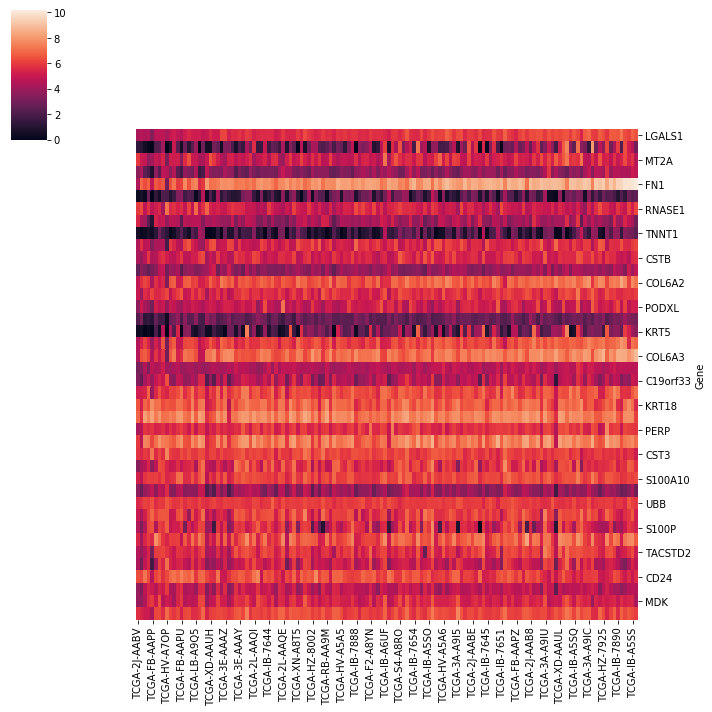

In [186]:
import seaborn as sns
mini = expression_df.loc[np.concatenate((squam_genes, ed_genes))]
mini = pd.DataFrame(data=np.log1p(mini.values), columns=mini.columns, index=mini.index)
mini.columns = [c[:12] for c in mini.columns]
mini = mini.loc[:, sample_order]
sns.clustermap(mini, col_cluster=False, row_cluster=False)

In [180]:
df

Gene        Sample  Expression     sample_id     squam        ed  age  \
0     LGALS1  TCGA-OE-A75W    6.607893  TCGA-OE-A75W  533.0340  1049.841   75   
1      KRT6A  TCGA-OE-A75W    4.555770  TCGA-OE-A75W  533.0340  1049.841   75   
2       MT2A  TCGA-OE-A75W    5.661605  TCGA-OE-A75W  533.0340  1049.841   75   
3      BCAT1  TCGA-OE-A75W    4.180981  TCGA-OE-A75W  533.0340  1049.841   75   
4        FN1  TCGA-OE-A75W    7.123278  TCGA-OE-A75W  533.0340  1049.841   75   
...      ...           ...         ...           ...       ...       ...  ...   
5515    SLPI  TCGA-IB-7651    3.370394  TCGA-IB-7651  640.9785   400.837   64   
5516    CD24  TCGA-IB-7651    6.635119  TCGA-IB-7651  640.9785   400.837   64   
5517   RAB25  TCGA-IB-7651    4.180675  TCGA-IB-7651  640.9785   400.837   64   
5518     MDK  TCGA-IB-7651    4.800079  TCGA-IB-7651  640.9785   400.837   64   
5519  IFITM3  TCGA-IB-7651    6.522563  TCGA-IB-7651  640.9785   400.837   64   

      gender   race tumor_stage  survival_time  status dataset  
0       male  white   stage iia              8       2    tcga  
1       male  white   stage iia              8       2    tcga  
2       male  white   stage iia              8       2    tcga  
3       male  white   stage iia              8       2    tcga  
4       male  white   stage iia              8       2    tcga  
...      ...    ...         ...            ...     ...     ...  
5515  female  white   stage iib             19       2    tcga  
5516  female  white   stage iib             19       2    tcga  
5517  female  white   stage iib             19       2    tcga  
5518  female  white   stage iib             19       2    tcga  
5519  female  white   stage iib             19       2    tcga  

[5520 rows x 13 columns]

In [181]:
alt.Chart(df[df['Gene']=='FN1']).mark_circle().encode(
    x='Expression',
    y='squam'
)

alt.Chart(...)

In [182]:
alt.Chart(df[df['Gene']=='KRT18']).mark_circle().encode(
    x='Expression',
    y='squam'
)

alt.Chart(...)

#### cytotrace correlated genes

In [29]:
corrs = tumor.var['cytotrace_correlation'].sort_values(ascending=False)
genes, corrs = zip(*[(g, score)
        for g, score in zip(corrs.index, corrs)])

df = pd.DataFrame.from_dict({
    'gene': genes,
    'cytotrace_correlation': corrs
})
df
# sns.barplot(x='gene', y='cytotrace_correlation', data=df, color='black')

gene  cytotrace_correlation
0       C19orf33               0.712204
1         TM4SF1               0.693703
2          KRT18               0.692289
3           KRT8               0.686949
4           PERP               0.678979
...          ...                    ...
2918        NEFH                    NaN
2919     FAM19A5                    NaN
2920        JAM2                    NaN
2921       CYYR1                    NaN
2922  AC233755.1                    NaN

[2923 rows x 2 columns]

In [66]:
# adata.uns.keys()

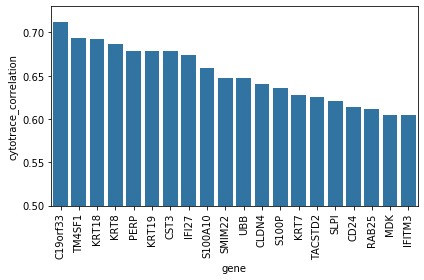

In [30]:
sns.barplot(x='gene', y='cytotrace_correlation', data=df.iloc[:20, :], color=sns.color_palette()[0])
plt.ylim((.5, .73))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(figdir, 'cytotrace_correlated_genes_barplot.pdf'))

In [69]:
adata.obs['cytotrace']

AAACCTGCACCACGTG-1-7          NaN
AAACCTGTCTAACTTC-1-7     0.143171
AAACGGGCAAGGCTCC-1-7          NaN
AAACGGGTCATTCACT-1-7          NaN
AAACGGGTCTGTGCAA-1-7          NaN
                           ...   
TTTCCTCGTACAGTGG-1-20    0.481176
TTTCCTCGTGTGACGA-1-20    0.035999
TTTGGTTAGAACTGTA-1-20    0.613081
TTTGGTTAGATGTGGC-1-20         NaN
TTTGTCAGTTCCACGG-1-20    0.059632
Name: cytotrace, Length: 11030, dtype: float64

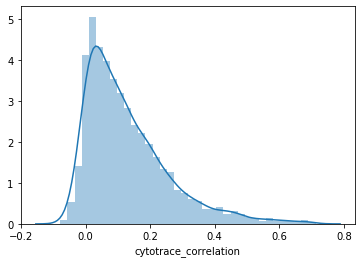

In [75]:
sns.distplot(adata.var['cytotrace_correlation'])

In [72]:
tumor.uns['rank_genes_groups']['names']['Squamous-like']

array(['LGALS1', 'KRT6A', 'GAPDH', 'TPI1', 'MIF', 'MT2A', 'RBX1', 'VIM',
       'BCAT1', 'FN1', 'EMP3', 'MRPL51', 'MIA', 'RNASE1', 'MRPL52',
       'RBP1', 'NPC2', 'TMSB4X', 'UQCR10', 'SEC61G', 'TRBC2', 'TNNT1',
       'TMSB10', 'SERPINF1', 'ROMO1', 'LCP1', 'CSTB', 'LDHB', 'PFN2',
       'ENO1', 'COL6A2', 'S100A16', 'OST4', 'S100A13', 'MIR4435-2HG',
       'PODXL', 'HMGA2', 'NEDD8', 'FTL', 'C4orf3', 'STC2', 'KRT5',
       'RPL26', 'PGAM1', 'SLC2A3', 'ARL4C', 'COL6A1', 'PHB2', 'COL6A3',
       'SLIRP', 'SRGN', 'RPL38', 'STMN1', 'RPLP0', 'IGFBP6', 'RPLP1',
       'ITGAE', 'S100A4', 'LSM1', 'PKM', 'PSMB6', 'SNU13', 'RPS26',
       'STRAP', 'NDUFA6', 'WIPF1', 'IFI27', 'CALD1', 'TOMM22', 'DMKN',
       'TXNDC17', 'STMN3', 'YWHAE', 'NDUFB2', 'LETM2', 'FKBP3', 'PGK1',
       'SERPINE2', 'AKR1B1', 'BRK1', 'TRAPPC1', 'RPL17', 'POLR2L',
       'RPL37A', 'C12orf57', 'RPL28', 'TUBA1B', 'FRMD6', 'CAV1', 'RPS12',
       'PMP22', 'UBE2L3', 'RPS5', 'MRPL40', 'GOLGA7', 'SPARC', 'TMEM230',
       'SNX6'

In [15]:
tumor.var['cytotrace_correlation']

ISG15         0.373986
RNF223        0.089139
TNFRSF18      0.034813
TNFRSF4      -0.003530
MXRA8         0.046810
                ...   
MCM3AP-AS1    0.021049
MCM3AP        0.236495
C21orf58     -0.017631
S100B        -0.009272
AC233755.1         NaN
Name: cytotrace_correlation, Length: 2923, dtype: float64

In [20]:
tumor.var[['cytotrace_correlation']].sort_values('cytotrace_correlation', ascending=False)

cytotrace_correlation
C19orf33                 0.712204
TM4SF1                   0.693703
KRT18                    0.692289
KRT8                     0.686949
PERP                     0.678979
...                           ...
NEFH                          NaN
FAM19A5                       NaN
JAM2                          NaN
CYYR1                         NaN
AC233755.1                    NaN

[2923 rows x 1 columns]

In [42]:
# vals, _ = zip(*tumor.uns['rank_genes_groups']['scores'])
# names, _ = zip(*tumor.uns['rank_genes_groups']['names'])
# tumor.uns['rank_genes_groups']['scores']['Squamous-like'], tumor.uns['rank_genes_groups']['names']['Squamous-like'][:5]
sq_df = pd.DataFrame.from_dict({
    'squamous_diff_index': tumor.uns['rank_genes_groups']['scores']['Squamous-like']
})
sq_df.index = tumor.uns['rank_genes_groups']['names']['Squamous-like']
sq_df.index.name = 'gene'
print(sq_df.shape)

cs_df = pd.DataFrame.from_dict({
    'classical_diff_index': tumor.uns['rank_genes_groups']['scores']['Classical']
})
cs_df.index = tumor.uns['rank_genes_groups']['names']['Classical']
cs_df.index.name = 'gene'

ed_df = tumor.var[['cytotrace_correlation']].copy()
ed_df.index.name = 'gene'
print(ed_df.shape)
print(len(set(ed_df.index).intersection(set(sq_df.index))))

df = pd.merge(ed_df, sq_df, left_index=True, right_index=True)
df.to_csv(os.path.join(figdir, 'genes_with_cytotrace_correlation_and_sq_differentials.tsv'),
         sep='\t', header=True, index=True)
df

(19480, 1)
(2923, 1)
2923


cytotrace_correlation  squamous_diff_index
gene                                                  
ISG15                    0.373986             1.984060
RNF223                   0.089139            -2.345743
TNFRSF18                 0.034813             3.637706
TNFRSF4                 -0.003530             1.069973
MXRA8                    0.046810             7.601693
...                           ...                  ...
MCM3AP-AS1               0.021049            -0.528880
MCM3AP                   0.236495            -1.964387
C21orf58                -0.017631            -0.487266
S100B                   -0.009272             1.302998
AC233755.1                    NaN             0.000000

[2923 rows x 2 columns]

In [73]:
df

cytotrace_correlation  squamous_diff_index
gene                                                  
ISG15                    0.373986             1.984060
RNF223                   0.089139            -2.345743
TNFRSF18                 0.034813             3.637706
TNFRSF4                 -0.003530             1.069973
MXRA8                    0.046810             7.601693
...                           ...                  ...
MCM3AP-AS1               0.021049            -0.528880
MCM3AP                   0.236495            -1.964387
C21orf58                -0.017631            -0.487266
S100B                   -0.009272             1.302998
AC233755.1                    NaN             0.000000

[2923 rows x 2 columns]

In [74]:
df.to_csv('/diskmnt/Projects/Users/estorrs/sandbox/sc_highly_variable_filtered.tsv', sep='\t')

In [68]:
adata.var['highly_variable']

ISG15         True
RNF223        True
TNFRSF18      True
TNFRSF4       True
MXRA8         True
              ... 
MCM3AP-AS1    True
MCM3AP        True
C21orf58      True
S100B         True
AC233755.1    True
Name: highly_variable, Length: 2923, dtype: bool

In [72]:
adata.raw.var[adata.raw.var['highly_variable']]

gene_ids-0  feature_types-0       gene_ids-1  \
ISG15       ENSG00000187608  Gene Expression  ENSG00000187608   
RNF223      ENSG00000237330  Gene Expression  ENSG00000237330   
TNFRSF18    ENSG00000186891  Gene Expression  ENSG00000186891   
TNFRSF4     ENSG00000186827  Gene Expression  ENSG00000186827   
MXRA8       ENSG00000162576  Gene Expression  ENSG00000162576   
...                     ...              ...              ...   
MCM3AP-AS1  ENSG00000215424  Gene Expression  ENSG00000215424   
MCM3AP      ENSG00000160294  Gene Expression  ENSG00000160294   
C21orf58    ENSG00000160298  Gene Expression  ENSG00000160298   
S100B       ENSG00000160307  Gene Expression  ENSG00000160307   
AC233755.1  ENSG00000275063  Gene Expression  ENSG00000275063   

                gene_ids-10 feature_types-10      gene_ids-11  \
ISG15       ENSG00000187608  Gene Expression  ENSG00000187608   
RNF223      ENSG00000237330  Gene Expression  ENSG00000237330   
TNFRSF18    ENSG00000186891  Gene Expression  ENSG00000186891   
TNFRSF4     ENSG00000186827  Gene Expression  ENSG00000186827   
MXRA8       ENSG00000162576  Gene Expression  ENSG00000162576   
...                     ...              ...              ...   
MCM3AP-AS1  ENSG00000215424  Gene Expression  ENSG00000215424   
MCM3AP      ENSG00000160294  Gene Expression  ENSG00000160294   
C21orf58    ENSG00000160298  Gene Expression  ENSG00000160298   
S100B       ENSG00000160307  Gene Expression  ENSG00000160307   
AC233755.1  ENSG00000275063  Gene Expression  ENSG00000275063   

           feature_types-11      gene_ids-12 feature_types-12  \
ISG15       Gene Expression  ENSG00000187608  Gene Expression   
RNF223      Gene Expression  ENSG00000237330  Gene Expression   
TNFRSF18    Gene Expression  ENSG00000186891  Gene Expression   
TNFRSF4     Gene Expression  ENSG00000186827  Gene Expression   
MXRA8       Gene Expression  ENSG00000162576  Gene Expression   
...                     ...              ...              ...   
MCM3AP-AS1  Gene Expression  ENSG00000215424  Gene Expression   
MCM3AP      Gene Expression  ENSG00000160294  Gene Expression   
C21orf58    Gene Expression  ENSG00000160298  Gene Expression   
S100B       Gene Expression  ENSG00000160307  Gene Expression   
AC233755.1  Gene Expression  ENSG00000275063  Gene Expression   

                gene_ids-13  ... n_cells     mt n_cells_by_counts mean_counts  \
ISG15       ENSG00000187608  ...   13977  False              4109    0.862118   
RNF223      ENSG00000237330  ...    1021  False               207    0.015244   
TNFRSF18    ENSG00000186891  ...    3078  False               419    0.042250   
TNFRSF4     ENSG00000186827  ...    2797  False               536    0.051613   
MXRA8       ENSG00000162576  ...    1294  False               539    0.139195   
...                     ...  ...     ...    ...               ...         ...   
MCM3AP-AS1  ENSG00000215424  ...     463  False               140    0.008792   
MCM3AP      ENSG00000160294  ...    4999  False              1994    0.144676   
C21orf58    ENSG00000160298  ...     934  False               265    0.024893   
S100B       ENSG00000160307  ...    1431  False               755    0.199258   
AC233755.1  ENSG00000275063  ...      60  False                24    0.043163   

           pct_dropout_by_counts total_counts highly_variable     means  \
ISG15                  76.540108      15100.0            True  0.979186   
RNF223                 98.818156        267.0            True  0.015967   
TNFRSF18               97.607765        740.0            True  0.123177   
TNFRSF4                96.939766        904.0            True  0.153105   
MXRA8                  96.922638       2438.0            True  0.165184   
...                          ...          ...             ...       ...   
MCM3AP-AS1             99.200685        154.0            True  0.014368   
MCM3AP                 88.615472       2534.0            True  0.253252   
C21orf58               98.

In [43]:

ed_df.sort_values('cytotrace_correlation', ascending=False).to_csv(
    os.path.join(figdir, 'cytotrace_correaltions.tsv'), sep='\t')
ed_df.sort_values('cytotrace_correlation', ascending=False)

cytotrace_correlation
gene                             
C19orf33                 0.712204
TM4SF1                   0.693703
KRT18                    0.692289
KRT8                     0.686949
PERP                     0.678979
...                           ...
NEFH                          NaN
FAM19A5                       NaN
JAM2                          NaN
CYYR1                         NaN
AC233755.1                    NaN

[2923 rows x 1 columns]

In [44]:
cytotrace_correlations = pd.read_csv('../results/cytotrace/eus_malignant_correlations_v1.txt', sep='\t')
cytotrace_correlations.columns = ['cytotrace_correlation']
cytotrace_correlations.index.name='gene'
cytotrace_correlations.to_csv(
    os.path.join(figdir, 'cytotrace_correaltions_all.tsv'), sep='\t')
cytotrace_correlations

cytotrace_correlation
gene                           
MYL6                   0.796273
MYL12B                 0.791984
SERF2                  0.781755
PPDPF                  0.781690
COX6A1                 0.777459
...                         ...
ZNF587                -0.073083
PCDHGA8               -0.074785
PCDHGA6               -0.077844
ZNF587B               -0.077994
PCDHGA10              -0.083603

[17143 rows x 1 columns]

In [45]:
sq_df.sort_values('squamous_diff_index', ascending=False).to_csv(
    os.path.join(figdir, 'squam_differentials.tsv'), sep='\t')
sq_df.sort_values('squamous_diff_index', ascending=False)

squamous_diff_index
gene                        
LGALS1             39.043777
KRT6A              31.473989
GAPDH              27.505606
TPI1               23.034534
MIF                19.547117
...                      ...
SPINK1            -17.251524
CEACAM6           -17.500429
LGALS4            -17.599150
TFF1              -18.742846
ELF3              -18.745646

[19480 rows x 1 columns]

In [46]:
cs_df.sort_values('classical_diff_index', ascending=False).to_csv(
    os.path.join(figdir, 'classical_differentials.tsv'), sep='\t')
cs_df.sort_values('classical_diff_index', ascending=False)

classical_diff_index
gene                         
ELF3                46.106735
TFF1                46.099854
LGALS4              43.286819
CEACAM6             43.044006
SPINK1              42.431801
...                       ...
MIF                -48.078033
TPI1               -56.655674
GAPDH              -67.652710
KRT6A              -77.413338
LGALS1             -96.031967

[19480 rows x 1 columns]

In [ ]:
sq_df.sort_values('squamous_diff_index', ascending=False).to_csv(
    os.path.join(figdir, 'squam_differentials.tsv'), sep='\t')
sq_df.sort_values('squamous_diff_index', ascending=False)

In [83]:
tumor.uns['rank_genes_groups']['scores']['Squamous-like']

array([39.043777 , 31.47399  , 27.505606 , 23.034534 , 19.547117 ,
       19.088545 , 18.689138 , 17.830181 , 17.726334 , 17.056946 ,
       16.708609 , 16.247593 , 16.191116 , 16.189676 , 16.119463 ,
       15.731211 , 15.637745 , 15.419168 , 15.408213 , 15.008326 ,
       14.703262 , 14.653149 , 14.3696575, 14.22748  , 14.213815 ,
       13.955686 , 13.865602 , 13.613729 , 13.455067 , 13.359137 ,
       12.508809 , 12.451783 , 12.437367 , 12.363468 , 12.333918 ,
       12.330061 , 12.197553 , 12.092658 , 12.025576 , 11.887756 ,
       11.81638  , 11.774407 , 11.71685  , 11.643012 , 11.427288 ,
       11.425895 , 11.267208 , 11.236203 , 11.179222 , 11.128084 ,
       11.0931   , 11.005716 , 10.910743 , 10.869016 , 10.815036 ,
       10.790762 , 10.746312 , 10.677113 , 10.40783  , 10.403463 ,
       10.345737 , 10.337476 , 10.210396 , 10.207159 , 10.2055645,
       10.151516 , 10.132163 ,  9.970002 ,  9.927464 ,  9.812253 ,
        9.792746 ,  9.739609 ,  9.704071 ,  9.698801 ,  9.6649